In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier

In [42]:
# Create a scatterplot of sepal length by width in the data set

column_names = ['sepLength', 'sepWidth', 'petLength', 'petWidht', 'class']
iris = pd.read_csv('/Users/Stephanie/desktop/thinkful/projects/U4L4-KNN-analysis/iris.csv', names=column_names)

iris.head(3)

,sepLength,sepWidth,petLength,petWidht,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


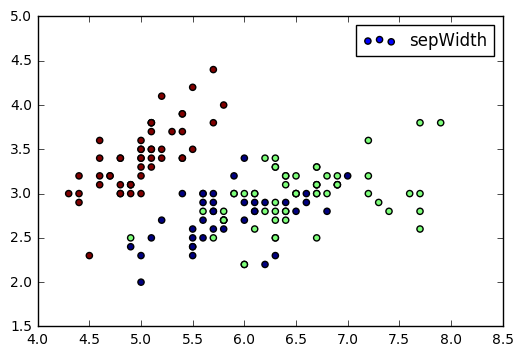

In [55]:
iris['classBin'] = iris['class'].map(lambda x: 2 if x == 'Iris-setosa' else 1 if x == 'Iris-virginica' else 0) 
plt.figure('scatterplot')
plt.scatter(iris['sepLength'], iris['sepWidth'], c=iris['classBin'])
plt.show()

In [44]:
# Pick a new point, programmatically at random.
point = iris.iloc[np.random.randint(1, len(iris))]
print("POINT SELECTED")
print(point)

#Sort each point by its distance from the new point, and subset the 10 nearest points.
distances = []

for index, flower in iris.iterrows():
    distance = sqrt( (flower['sepLength'] - point['sepLength'])**2 + (flower['sepWidth'] - point['sepWidth'])**2 )
    distances.append(distance)

iris['distance'] = distances
iris = iris.drop(point.name) # check why

closests = iris.sort_values(by='distance').head(10)

print("")
print("CLOSEST POINTS")
closests

POINT SELECTED
sepLength               7.1
sepWidth                  3
petLength               5.9
petWidht                2.1
class        Iris-virginica
classBin                  1
Name: 102, dtype: object

CLOSEST POINTS


,sepLength,sepWidth,petLength,petWidht,class,classBin,distance
129,7.2,3.0,5.8,1.6,Iris-virginica,1,0.100000
141,6.9,3.1,5.1,2.3,Iris-virginica,1,0.223607
139,6.9,3.1,5.4,2.1,Iris-virginica,1,0.223607
52,6.9,3.1,4.9,1.5,Iris-versicolor,0,0.223607
50,7.0,3.2,4.7,1.4,Iris-versicolor,0,0.223607
107,7.3,2.9,6.3,1.8,Iris-virginica,1,0.223607
125,7.2,3.2,6.0,1.8,Iris-virginica,1,0.223607
120,6.9,3.2,5.7,2.3,Iris-virginica,1,0.282843
112,6.8,3.0,5.5,2.1,Iris-virginica,1,0.300000
143,6.8,3.2,5.9,2.3,Iris-virginica,1,0.360555


In [45]:
# Determine the majority class of the subset.
majClass = closests['class'].mode()[0]
repetitions = closests['class'][closests['class'] == majClass].count()
                                
print("the majority class is {} with {} repetitions".format(majClass, repetitions))

the majority class is Iris-virginica with 8 repetitions


In [46]:
# Write a function called knn() that will take k as an argument
# and return the majority class for different values of k.

def knn(k):
    '''returns majority class for different values of k, being k the number of closest points to a given point'''
    closests = iris.sort_values(by='distance').iloc[0:k]
    print("closests points for a value of k of {}".format(k))
    return closests

#example of the function for k=5
knn(5)

closests points for a value of k of 5


,sepLength,sepWidth,petLength,petWidht,class,classBin,distance
129,7.2,3.0,5.8,1.6,Iris-virginica,1,0.100000
141,6.9,3.1,5.1,2.3,Iris-virginica,1,0.223607
139,6.9,3.1,5.4,2.1,Iris-virginica,1,0.223607
52,6.9,3.1,4.9,1.5,Iris-versicolor,0,0.223607
50,7.0,3.2,4.7,1.4,Iris-versicolor,0,0.223607


In [90]:
# Write a script called "knn.py" to generate a kNN model and output the results. 
X = iris[['sepLength', 'sepWidth']]
Y = iris['classBin']

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, Y)

neigh.predict([[8.3,5]])

array([1])